In [ ]:
"""
initial explorations on the annotated portion of the comment dataset. 
evalutate the potential for classification of comments containing beta. 
investigate the language use in comments containing beta. 

author: eoghan cunningham
"""

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
import seaborn as sns
import math
plt.rcParams.update({'font.size': 13})

In [2]:
df = pd.read_csv("samples.csv").drop("Unnamed: 0", axis = 1)
df.label.value_counts()

0     179
1     124
11      1
Name: label, dtype: int64

In [3]:
df['label'] = df['label'].map(lambda x: str(x)[0] if len(str(x))>1 else str(x))
df = pd.concat([df[df['label'] == '0'].sample(n=179),df[df['label'] == '1']])
df.label.value_counts()

0    179
1    125
Name: label, dtype: int64

In [4]:
print(df[df['label'] == '1'].sample()['comment'].iloc[0])

Found a great way to gain the (polished) crack: push up with the palm of your right hand until you can get your right foot on the left-facing wall. Brilliant!


In [5]:
print(df[df['label'] == '0'].sample()['comment'].iloc[0])

Another crap, dirty eliminate route like Four Pebble. Don't bother.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        df['comment'], df['label'], random_state = 1,
        test_size = 0.25, stratify = df['label'])

In [8]:
df['comment_length'] = df['comment'].map(len)
df['num_words'] = df['comment'].map(lambda x: len(x.split()))
df.sort_values(by = 'comment_length').iloc[:10]

,beta,date,climber_id,route_info,comment,label,cosine,random_forest,comment_length,num_words
156,0,"27 May, 2019",158766,One_Step_in_the_Clouds_VS_4c,P2,0,NaN,0.0,2,1
241,0,"6 Apr, 2007",90264,The_Keffer_HVS_5a,scary!,0,NaN,0.0,6,1
243,0,"8 Sep, 2019",143309,Merlin_Direct_HVS_5a,Pitch 2.,0,NaN,0.0,8,2
51,1,"28 Sep, 2019",243511,Tramp_VS_4c,Fist jam,0,NaN,NaN,8,2
15,1,"31 Aug, 2019",146346,South_Chimney_VD_4a,Crux start,0,NaN,NaN,10,2
28,1,"10 Jun, 2019",150939,Parson's_Chimney_HS_4b,Good grief!,0,NaN,NaN,11,2
188,0,"13 Sep, 2019",241471,Green_Gut_HS_4a,Incredible!,0,NaN,0.0,11,1
160,0,"11 Jul, 2019",17395,Sand_Crack_HS_4b,Only HS???!!!,0,NaN,0.0,13,2
43,1,"17 Sep, 2007",179,Triple_Cracks_HS_4c,Awkward Bugger,0,NaN,NaN,14,2
231,0,"2 Jul, 2019",87781,Aaros_E1_5b,Silent partner,0,NaN,0.0,14,2


In [9]:
df

,beta,date,climber_id,route_info,comment,label,cosine,random_forest,comment_length,num_words
255,0,"29 Nov, 2004",19516,Green_Gut_HS_4a,"Not a nice route, very overrated. Can't believ...",0,0.733125,0.000000,126,26
231,0,"2 Jul, 2019",87781,Aaros_E1_5b,Silent partner,0,NaN,0.000000,14,2
0,1,"20 Jul, 2019",204193,Dirty_Dick_VS_4b,Starts with nice protection then has one hell ...,0,NaN,NaN,131,23
30,1,"1 Jul, 2019",219600,Alison_Rib_D,Link first and second pitch. Belay from the ed...,0,NaN,NaN,113,19
14,1,"8 Jul, 2019",261988,Little_Chamonix_VD,Nicely done in 3 pitches. The belay spot for p...,0,NaN,NaN,81,18
176,0,"25 Oct, 2004",184,Knight's_Move_HVS_5a,The VS/HVS debate shouldn't distract from the ...,0,0.733125,0.000000,84,15
292,0,"2 Oct, 2005",12907,Outlook_Slab_VS_5a,"Quite a pleasing route, flows well. Just the ...",0,0.551448,0.840000,340,59
251,0,"4 Jul, 2003",95,The_Grogan_HVS_5c,How can a route this short get you THAT pumped...,0,0.733125,0.000000,79,14
303,0,"27 Aug, 2019",135107,Raven_Rock_Gully_D,"Nice clean climb, fun exit, good to be skinny....",0,0.797093,0.000000,128,27
137,1,"17 Oct, 2005",1387,Eric's_Eliminate_S_4a,"lovely route offering cracks of all sizes, its...",0,NaN,NaN,108,22


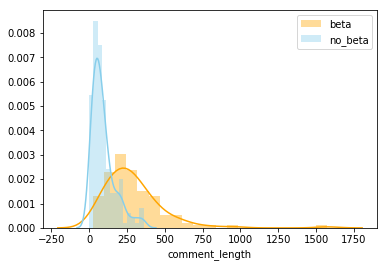

In [10]:
sns.distplot(df[df['label'] == '1']['comment_length'],color='orange')
sns.distplot(df[df['label'] == '0']['comment_length'],color='skyblue')
plt.legend(['beta', 'no_beta'])
plt.show()

In [11]:
df[df['label'] == '1'].comment_length.mean()

289.496

In [12]:
df[df['label'] == '0'].comment_length.mean()

93.20111731843575

In [14]:
asm_vect = TfidfVectorizer(
    ngram_range = (1,3), min_df = 5, stop_words = 'english')

X_train_vect = asm_vect.fit_transform(X_train)
X_test_vect = asm_vect.transform(X_test)

clf = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf.fit(X_train_vect.toarray(), y_train)

pred = clf.predict(X_test_vect.toarray())
print(metrics.classification_report(y_test, pred, target_names = ['no_beta', 'beta']))

              precision    recall  f1-score   support

     no_beta       0.87      0.87      0.87        45
        beta       0.81      0.81      0.81        31

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [15]:
clf = GaussianNB()
clf.fit(X_train_vect.toarray(), y_train)

pred = clf.predict(X_test_vect.toarray())
print(metrics.classification_report(y_test, pred, target_names = ['no_beta', 'beta']))

              precision    recall  f1-score   support

     no_beta       0.87      0.76      0.81        45
        beta       0.70      0.84      0.76        31

    accuracy                           0.79        76
   macro avg       0.79      0.80      0.79        76
weighted avg       0.80      0.79      0.79        76



In [16]:
clf = SVC(kernel = 'linear', gamma = 'scale')
clf.fit(X_train_vect.toarray(), y_train)

pred = clf.predict(X_test_vect.toarray())
print(metrics.classification_report(y_test, pred, target_names = ['no_beta', 'beta']))

              precision    recall  f1-score   support

     no_beta       0.84      0.84      0.84        45
        beta       0.77      0.77      0.77        31

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [19]:
clf = make_pipeline(
                    TfidfVectorizer(ngram_range = (1,3), min_df = 5, stop_words = 'english'), 
                    SVC(kernel = 'linear', gamma = 'scale')
)
scores_svm = model_selection.cross_val_score(clf, df.comment, df.label, cv=10, scoring='f1_macro')
scores_svm.mean()

0.8339735982914351

In [20]:
clf = make_pipeline(
                    TfidfVectorizer(ngram_range = (1,3), min_df = 5, stop_words = 'english'), 
                    RandomForestClassifier(n_estimators = 50)
)
scores_rf = model_selection.cross_val_score(clf, df.comment, df.label, cv=10, scoring='f1_macro')
scores_rf.mean()

0.8425083354223437

In [21]:
vect = CountVectorizer(ngram_range = (2,3), stop_words = 'english')
vect = vect.fit(df.comment.apply("".join))
beta = vect.transform(df[df['label']=='1'].comment)
no_beta = vect.transform(df[df['label']=='0'].comment)

In [22]:
beta_grams = beta.sum(axis = 0)
no_beta_grams = no_beta.sum(axis = 0)
beta_grams_freq = [(gram, beta_grams[0, idx]) for gram, idx in vect.vocabulary_.items()]
no_beta_grams_freq = [(gram, no_beta_grams[0, idx]) for gram, idx in vect.vocabulary_.items()]
beta_gf = pd.DataFrame(list(sorted(beta_grams_freq, key = lambda x: x[1], reverse=True)),columns=['terms','beta'])
no_beta_gf = pd.DataFrame(list(sorted(no_beta_grams_freq, key = lambda x: x[1], reverse=True)),columns=['terms','no_beta'])

In [23]:
beta_gf_df = beta_gf.set_index("terms")
no_beta_gf_df = no_beta_gf.set_index("terms")
comment_gram_df = pd.concat([no_beta_gf_df,beta_gf_df],axis = 1, sort = False)

In [24]:
comment_gram_df['dif'] = comment_gram_df['beta'] - comment_gram_df['no_beta']

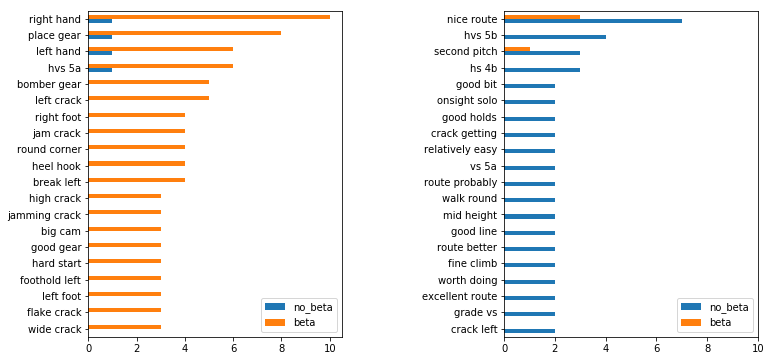

In [25]:
f, axarr = plt.subplots(1, 2,figsize=(12, 6))
comment_gram_df.sort_values(by ='dif', ascending = False)[['no_beta','beta']][:20].sort_values(by = 'beta').plot.barh(ax=axarr[0])
comment_gram_df.sort_values(by ='dif', ascending = False)[['no_beta','beta']][::-1][:20].sort_values(by = 'no_beta').plot.barh(ax=axarr[1]).set_xlim([0, 10])
plt.subplots_adjust(wspace = 0.64)
plt.show()